In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

**Read input data**

In [2]:
df_train = pd.read_csv('/kaggle/input/titanic-dataset/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic-dataset/test.csv')
df_submission = pd.read_csv('/kaggle/input/titanic-dataset/gender_submission.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Drop unuseful features**

In [5]:
df_train.drop('Name', axis = 'columns', inplace=True)
df_test.drop('Name', axis = 'columns', inplace=True)
df_train.drop('Ticket', axis='columns', inplace=True)
df_test.drop('Ticket', axis = 'columns', inplace=True)
df_train.drop('PassengerId', axis='columns',inplace= True)
df_test.drop('PassengerId',axis='columns', inplace=True)

In [6]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


**Watch missing values**

In [7]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

**Drop cabin feature because of number of missing values in the column**

In [8]:
df_train.drop('Cabin', axis = 'columns',inplace=True)
df_test.drop('Cabin',axis='columns',inplace=True)

In [9]:
df_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

**Building graphics and data distribution**

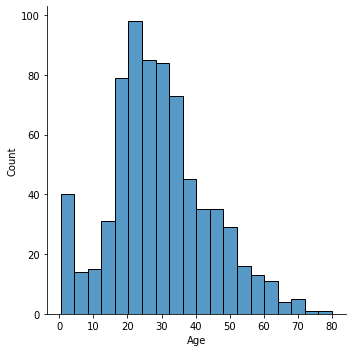

In [10]:
sns.displot(df_train['Age'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


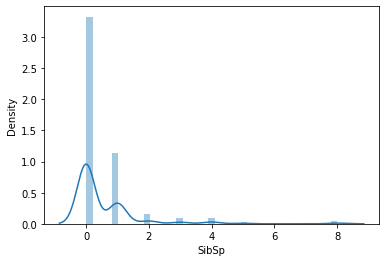

In [11]:
sns.distplot(df_train['SibSp'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


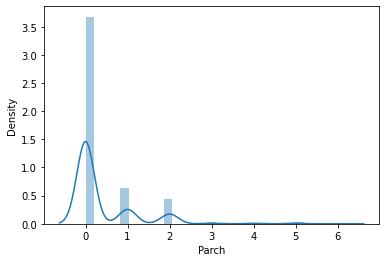

In [12]:
sns.distplot(df_train['Parch'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


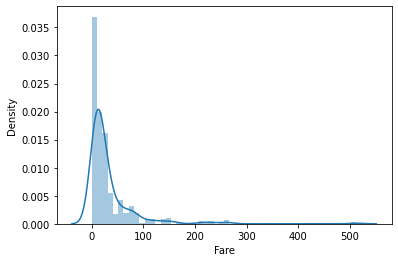

In [13]:
sns.distplot(df_train['Fare'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


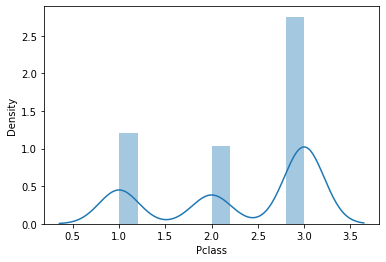

In [14]:
sns.distplot(df_train['Pclass'])
plt.show()

**Fill missing values with mode**

In [15]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].value_counts().index[0])
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].value_counts().index[0])
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].value_counts().index[0])
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].value_counts().index[0])
df_train.isnull().sum()
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

**Label encoding categorical features**

In [16]:
labelencoder = LabelEncoder()
df_train['Embarked'] = labelencoder.fit_transform(df_train['Embarked'])
df_train['Sex'] = labelencoder.fit_transform(df_train['Sex'])
df_test['Embarked'] = labelencoder.fit_transform(df_test['Embarked'])
df_test['Sex'] = labelencoder.fit_transform(df_test['Sex'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sex', ylabel='Density'>

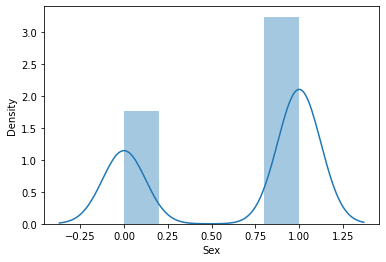

In [17]:
sns.distplot(df_train['Sex'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Embarked', ylabel='Density'>

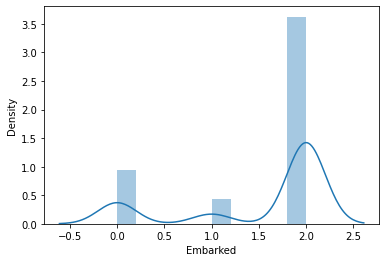

In [18]:
sns.distplot(df_train['Embarked'])

In [19]:
df_train['Sex'] = df_train['Sex'].astype('category')
df_train['SibSp'] = df_train['SibSp'].astype('category')
df_train['Parch'] = df_train['Parch'].astype('category')
df_train['Embarked'] = df_train['Embarked'].astype('category')
df_train['Pclass'] = df_train['Pclass'].astype('category')
df_test['Sex'] = df_test['Sex'].astype('category')
df_test['SibSp'] = df_test['SibSp'].astype('category')
df_test['Parch'] = df_test['Parch'].astype('category')
df_test['Embarked'] = df_test['Embarked'].astype('category')
df_test['Pclass'] = df_test['Pclass'].astype('category')
df_train.dtypes
df_test.dtypes

Pclass      category
Sex         category
Age          float64
SibSp       category
Parch       category
Fare         float64
Embarked    category
dtype: object

**Split numerical features in another dataframe**

In [20]:
df_numeric = df_train[['Age', 'Fare']]
df_numeric_test = df_test[['Age', 'Fare']]

**Watching outliers**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


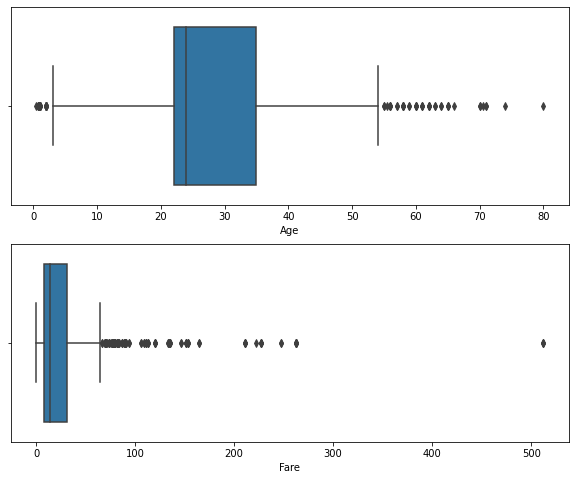

In [21]:
features = df_numeric.columns
fig, axes = plt.subplots(nrows=len(features), ncols=1)
fig.set_size_inches(10, 8)
for i, col in enumerate(features):
    sns.boxplot(df_numeric[col], ax=axes[i])
plt.show()

**Log function for Fare feature because of exponential distribution, it will decrease the number of outliers**

In [22]:
to_log = ['Fare']
df_log = df_train[to_log].applymap(lambda x: np.log(x+1))
df_log_test = df_test[to_log].applymap(lambda x: np.log(x+1))
df_log.columns = 'log_' + df_log.columns
df_log.index = df_log.index + 1
df_log.reset_index(drop=True)
df_log_test.columns = 'log_' + df_log_test.columns
df_log_test.index = df_log_test.index + 1
df_log_test.reset_index(drop=True)

,log_Fare
0,2.178064
1,2.079442
2,2.369075
3,2.268252
4,2.586824
...,...
413,2.202765
414,4.699571
415,2.110213
416,2.202765


**Change Fare on ln(Fare) feature**

In [23]:
df_train.drop('Fare', axis = 1, inplace=True)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_log = df_log.reset_index(drop=True)
df_log_test = df_log_test.reset_index(drop=True)
df_train = pd.concat([df_log, df_train], axis = 1)
df_test = pd.concat([df_log_test, df_test], axis = 1)

In [24]:
df_numeric.drop('Fare', inplace=True, axis=1)
df_numeric = pd.concat([df_log, df_numeric], axis = 1)

**Delete rows that have outliers in Age or log_Fare feature**

In [25]:
def HandleOutliers(df_train, df_numeric, feature):
    data_mean, data_std = np.mean(df_numeric[feature]), np.std(df_numeric[feature])
    cut_off = data_std * 2
    lower, upper = data_mean - cut_off, data_mean + cut_off
    for index, row in df_numeric.iterrows():
        if row[feature] > upper or row[feature] < lower:
            df_train.drop(index, inplace = True)
            df_numeric.drop(index, inplace = True)
HandleOutliers(df_train, df_numeric, 'Age')
HandleOutliers(df_train, df_numeric, 'log_Fare')

**Watching outliers after deleting**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


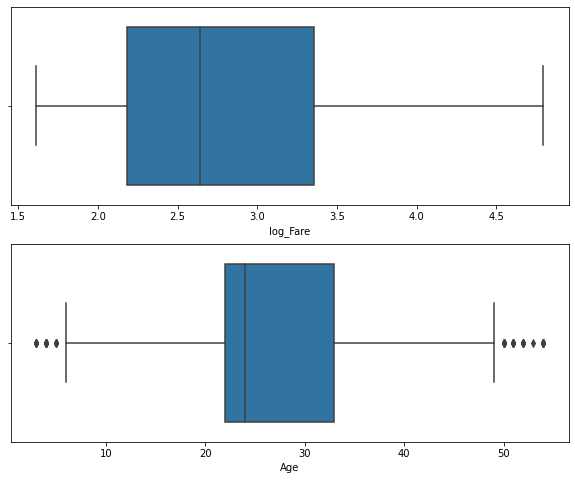

In [26]:
features = df_numeric.columns
fig, axes = plt.subplots(nrows=len(features), ncols=1)
fig.set_size_inches(10, 8)
for i, col in enumerate(features):
    sns.boxplot(df_numeric[col], ax=axes[i])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_Fare', ylabel='Density'>

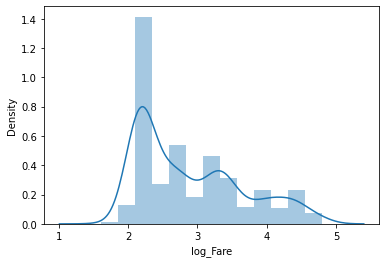

In [27]:
sns.distplot(df_numeric['log_Fare'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

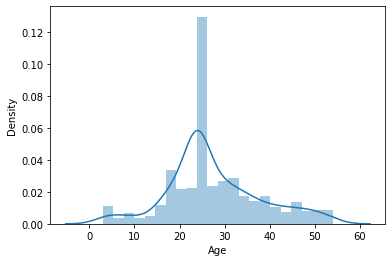

In [28]:
sns.distplot(df_numeric['Age'])

In [29]:
df_train_y = df_train['Survived']
df_train.drop('Survived', inplace=True, axis=1)

**Watching correlation matrix**

In [30]:
df_train.corr()

,log_Fare,Age
log_Fare,1.000000,0.148332
Age,0.148332,1.000000


**Clustering data with KMeans algorithm**

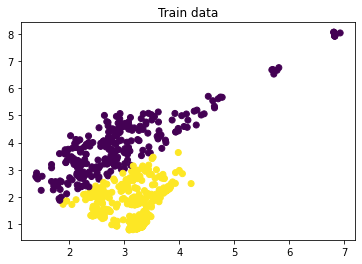

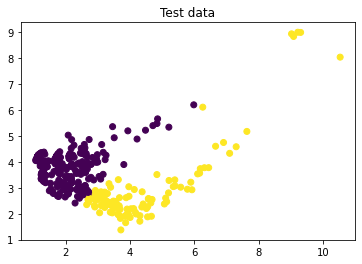

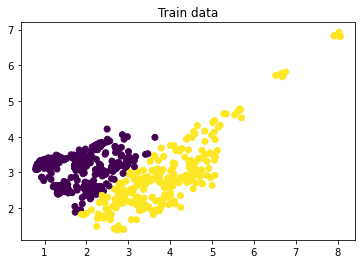

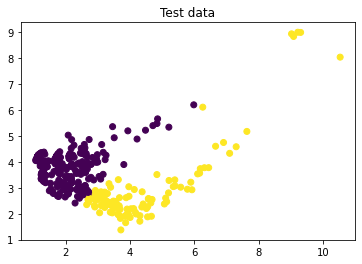

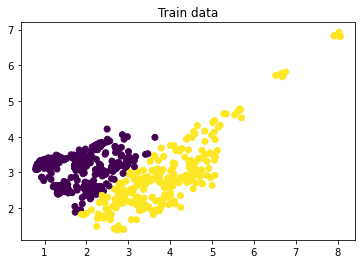

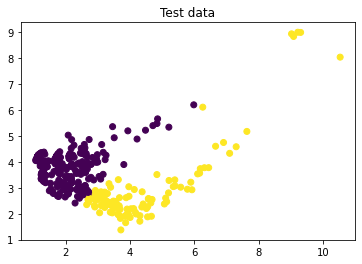

In [31]:
def kmeans_plot(df_train, df_test, max_iter, tol):
    kmeans = KMeans(n_clusters = 2, max_iter = max_iter, tol = tol)
    df_train_scaled = StandardScaler().fit_transform(df_train)
    df_test_scaled = StandardScaler().fit_transform(df_test)
    df_train_plot = kmeans.fit_transform(df_train_scaled)
    result_train = kmeans.labels_
    df_test_plot = kmeans.fit_transform(df_test_scaled)
    result_test = kmeans.labels_
    plt.subplot()
    plt.title('Train data')
    plt.scatter(df_train_plot[:, 0], df_train_plot[:, 1], c=result_train)
    plt.show()
    plt.subplot()
    plt.title('Test data')
    plt.scatter(df_test_plot[:, 0], df_test_plot[:, 1], c=result_test)
    plt.show()
    
kmeans_plot(df_train, df_test, 1000, 0.001)
kmeans_plot(df_train, df_test, 100, 0.01)
kmeans_plot(df_train, df_test, 1000, 0.0001)

**Clustering data with DBSCAN algorithm**

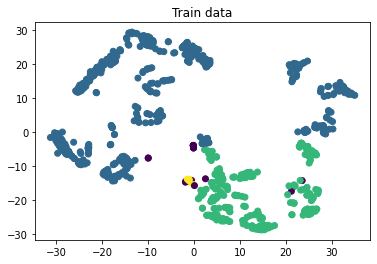

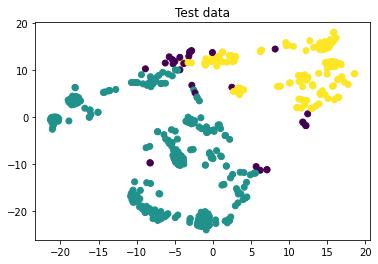

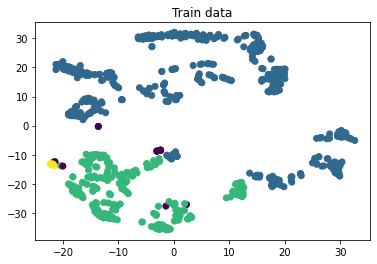

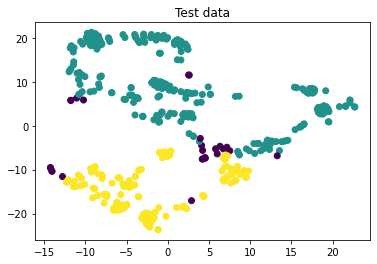

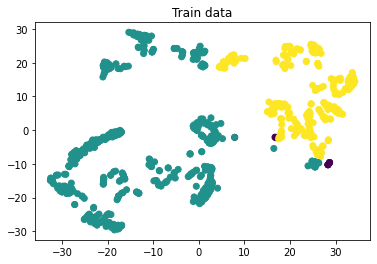

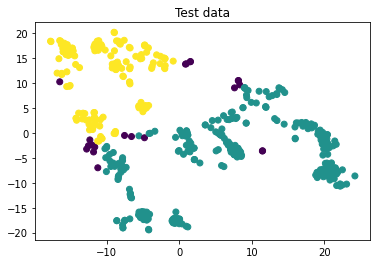

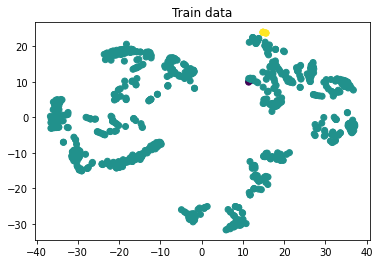

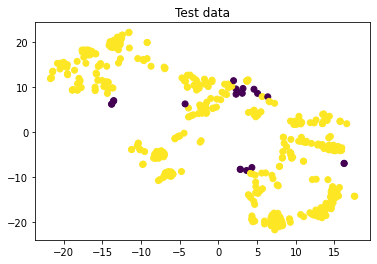

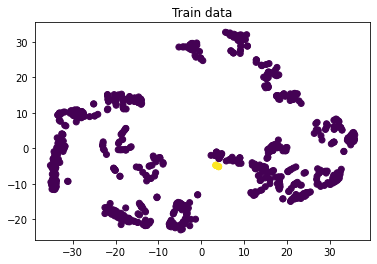

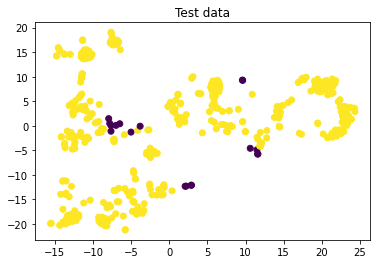

In [32]:
def DBSCAN_plot(df_train, df_test,radius):
    db = DBSCAN(eps = radius)
    df_train_scaled = StandardScaler().fit_transform(df_train)
    df_test_scaled = StandardScaler().fit_transform(df_test)
    tsne = TSNE()
    db.fit(df_train_scaled)
    result_train = db.labels_
    db.fit(df_test_scaled)
    result_test = db.labels_
    df_train_plot = tsne.fit_transform(df_train_scaled)
    df_test_plot = tsne.fit_transform(df_test_scaled)
    plt.subplot()
    plt.title('Train data')
    plt.scatter(df_train_plot[:, 0], df_train_plot[:, 1], c=result_train)
    plt.show()
    plt.subplot()
    plt.title('Test data')
    plt.scatter(df_test_plot[:, 0], df_test_plot[:, 1], c=result_test)
    plt.show()
DBSCAN_plot(df_train, df_test, 1.8)
DBSCAN_plot(df_train, df_test, 1.9)
DBSCAN_plot(df_train, df_test, 2.0)
DBSCAN_plot(df_train, df_test, 2.1)
DBSCAN_plot(df_train, df_test, 2.2)

**Clustering data with Agglomerative clustering algorithm**

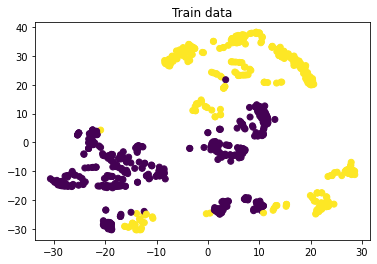

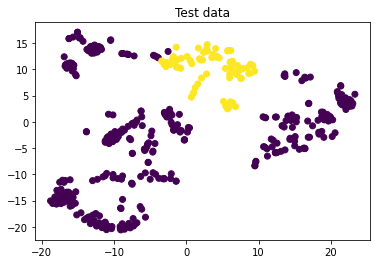

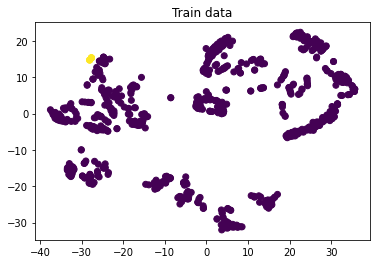

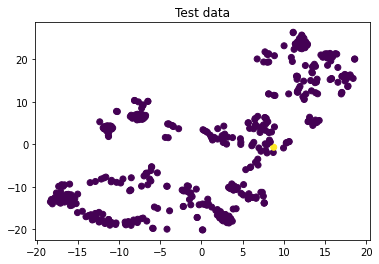

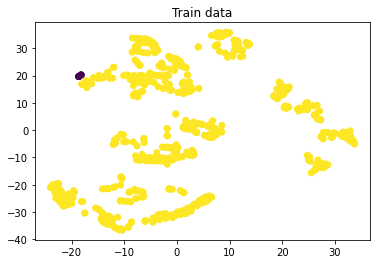

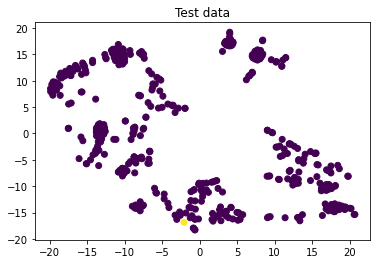

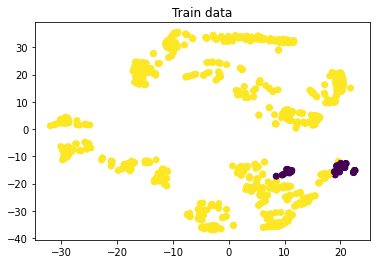

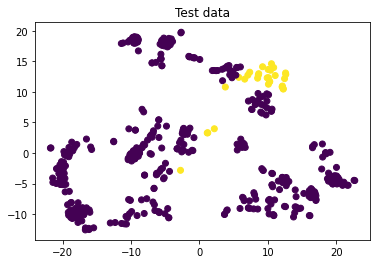

In [33]:
def Agglomerative_plot(df_train, df_test, linkage):
    agglo = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = linkage)
    df_train_scaled = StandardScaler().fit_transform(df_train)
    df_test_scaled = StandardScaler().fit_transform(df_test)
    tsne = TSNE()
    agglo.fit(df_train_scaled)
    result_train = agglo.labels_
    agglo.fit(df_test_scaled)
    result_test = agglo.labels_
    df_train_plot = tsne.fit_transform(df_train_scaled)
    df_test_plot = tsne.fit_transform(df_test_scaled)
    plt.subplot()
    plt.title('Train data')
    plt.scatter(df_train_plot[:, 0], df_train_plot[:, 1], c=result_train)
    plt.show()
    plt.subplot()
    plt.title('Test data')
    plt.scatter(df_test_plot[:, 0], df_test_plot[:, 1], c=result_test)
    plt.show()
Agglomerative_plot(df_train, df_test, 'ward')
Agglomerative_plot(df_train, df_test, 'average')
Agglomerative_plot(df_train, df_test, 'single')
Agglomerative_plot(df_train, df_test, 'complete')